In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
import missingno as msn

In [35]:
dataset = pd.read_csv("./footprint-nfa-2019-edition/footprint-nfa-2019-edition/data/nfa_2019_public_data.csv")

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
dataset

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5.11176e+09,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2.04218e+09,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [37]:
dataset["qscore"].value_counts()

3A    51481
2A    10576
2B    10096
1B       16
1A       16
Name: qscore, dtype: int64

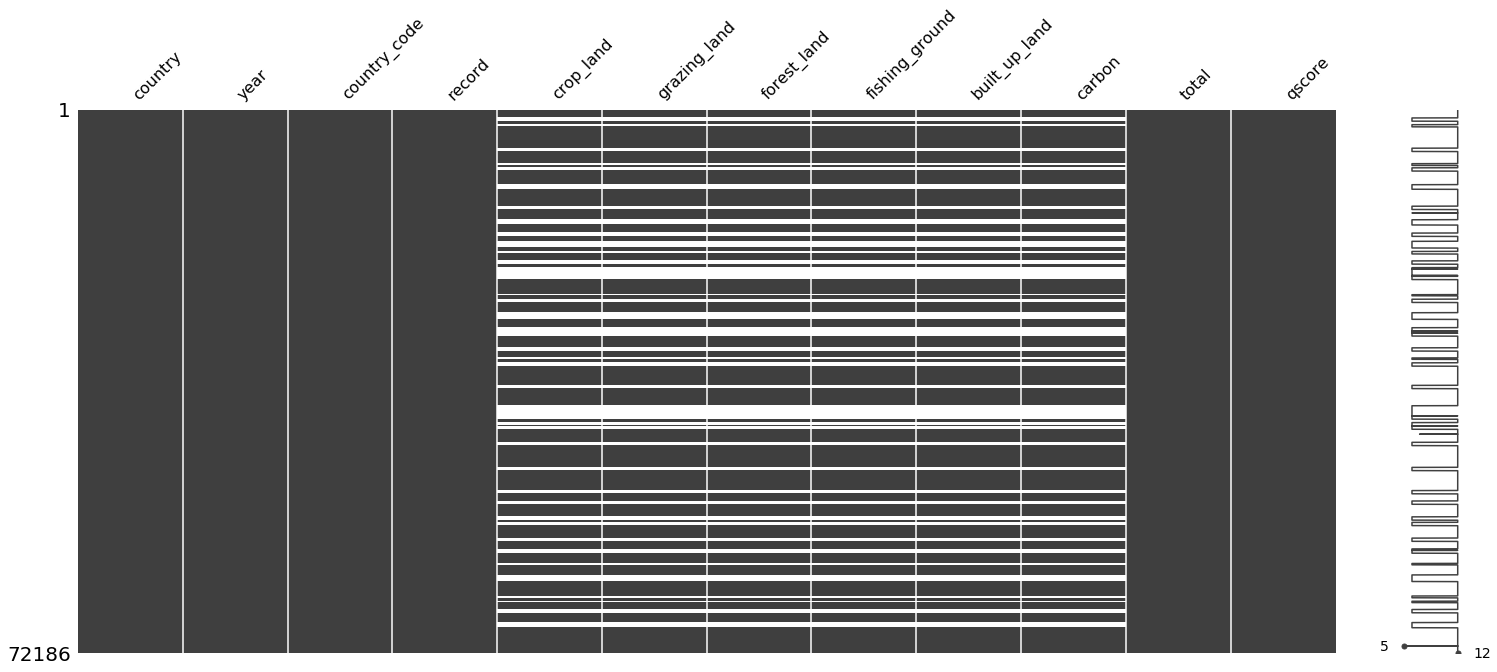

In [38]:
msn.matrix(dataset)

In [39]:
dataset = dataset.dropna()

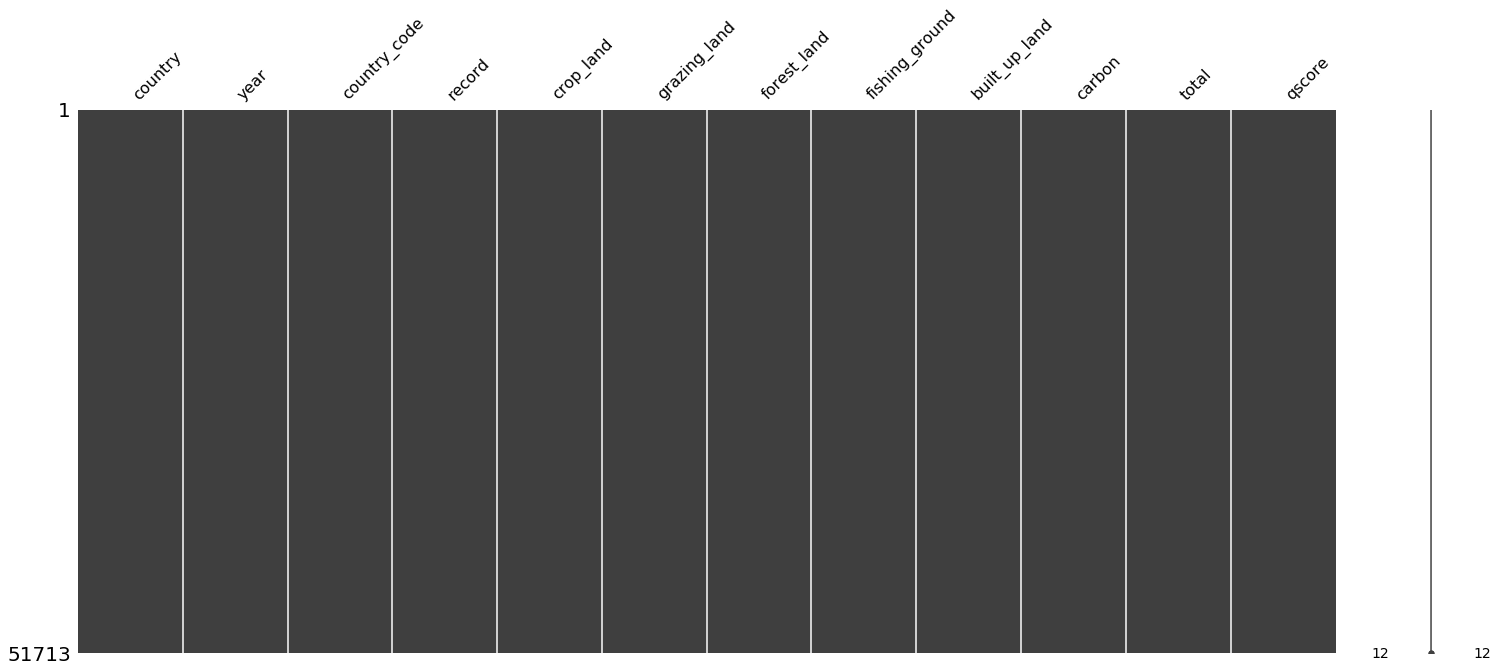

In [40]:
msn.matrix(dataset)

In [41]:
dataset["qscore"].value_counts()

3A    51473
2A      224
1A       16
Name: qscore, dtype: int64

In [42]:
#oversampling and undersampling
dataset["qscore"] = dataset["qscore"].replace(["1A"], "2A")

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
dataset["qscore"].value_counts()

3A    51473
2A      240
Name: qscore, dtype: int64

In [44]:
#create two dataframes of the two different classes
df_2A = dataset[dataset.qscore=="2A"]
df_3A = dataset[dataset.qscore=="3A"].sample(350)

#join the two different dataframes together
data_df = df_2A.append(df_3A)

In [45]:
import sklearn.utils
data_df = data_df.reset_index(drop=True)
data_df.shape

(590, 12)

In [46]:
data_df["qscore"].value_counts()

3A    350
2A    240
Name: qscore, dtype: int64

In [47]:
#more preprocessing
data_df = data_df.drop(columns=["country_code", "country", "year"])

In [48]:
data_df

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,AreaPerCap,2.072989e-01,8.112722e-01,0.048357265,2.258528e-02,2.998367e-02,0.000000e+00,1.119497e+00,2A
1,AreaTotHA,8.417600e+06,3.294260e+07,1963600,9.171000e+05,1.217520e+06,0.000000e+00,4.545842e+07,2A
2,BiocapPerCap,2.021916e-01,2.636077e-01,0.027166736,7.947991e-03,2.924496e-02,0.000000e+00,5.301590e-01,2A
3,BiocapTotGHA,8.210214e+06,1.070408e+07,1103135.245,3.227369e+05,1.187524e+06,0.000000e+00,2.152769e+07,2A
4,EFConsPerCap,6.280528e-01,1.810332e-01,0.162800822,1.472910e-02,2.924496e-02,1.391455e+00,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...
585,AreaTotHA,6.908132e+06,1.088918e+07,2435443.728,5.292617e+07,2.120920e+06,0.000000e+00,7.527984e+07,3A
586,EFConsTotGHA,6.393599e+07,7.468262e+06,22824014.03,2.602257e+06,2.511018e+06,1.331539e+08,2.324954e+08,3A
587,AreaTotHA,1.716514e+07,4.571710e+06,10583862.4,5.902764e+06,2.823228e+06,0.000000e+00,4.104671e+07,3A
588,BiocapTotGHA,7.357066e+03,0.000000e+00,479.1421776,6.227710e+05,2.281426e+04,0.000000e+00,6.534215e+05,3A


In [49]:
#create matrix of features X and y
X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

In [50]:
#make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [51]:
y_train.value_counts()

3A    237
2A    176
Name: qscore, dtype: int64

In [52]:
#encoding categorical variables
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#X_train.record = encoder.fit_transform(X_train.record)
#X_test.record = encoder.transform(X_test.record)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)

In [54]:
X_train_balanced

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
0,6,2.422341e-01,5.043183e-03,0.109805,6.923616e-03,0.039218,3.983781e-02,4.430611e-01
1,1,1.033733e+06,3.930115e+06,761965,1.352179e+07,176644.354400,0.000000e+00,1.942425e+07
2,2,6.481887e-01,6.128688e-03,2.03714,1.109850e+00,0.244831,0.000000e+00,4.046137e+00
3,4,4.707138e-01,1.406805e-01,0.714856,1.706471e-01,0.035655,7.590210e-01,2.291574e+00
4,6,2.829950e-01,1.286783e-01,0.00393865,1.999000e-04,0.094462,2.141098e-01,7.243837e-01
...,...,...,...,...,...,...,...,...
469,4,1.474368e+06,5.650665e+06,839456,3.020954e+05,198569.587655,1.626954e+06,1.009211e+07
470,4,4.537129e-01,2.040420e-01,0.144776,5.113343e-02,0.039136,1.069015e+00,1.961816e+00
471,1,5.136529e+05,2.101287e+06,3.53109e+06,5.274143e+05,147166.014827,0.000000e+00,6.820606e+06
472,3,6.463625e+06,1.195063e+07,929586,2.490275e+05,957459.350868,1.420242e+06,2.197057e+07


In [63]:
y_train_balanced

0      3A
1      2A
2      2A
3      2A
4      2A
       ..
469    2A
470    2A
471    2A
472    2A
473    2A
Name: qscore, Length: 474, dtype: object

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train_balanced.drop(columns=['record']))
normalised_train_df = pd.DataFrame(normalised_train_df, columns=X_train_balanced.drop(columns=['record']).columns)
normalised_train_df['record'] = X_train_balanced['record']

In [56]:
normalised_train_df

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,record
0,7.495449e-10,1.914211e-11,3.673827e-10,2.727906e-11,1.103984e-09,8.419452e-11,4.106128e-10,6
1,3.210576e-03,1.491730e-02,2.549368e-03,5.327587e-02,4.972573e-03,0.000000e+00,1.965037e-02,1
2,2.010362e-09,2.326230e-11,6.815822e-09,4.372809e-09,6.892047e-09,0.000000e+00,4.055633e-09,2
3,1.459159e-09,5.339725e-10,2.391753e-09,6.723500e-10,1.003703e-09,1.604140e-09,2.280645e-09,4
4,8.761406e-10,4.884167e-10,1.317787e-11,7.876063e-13,2.659123e-09,4.525067e-10,6.952104e-10,6
...,...,...,...,...,...,...,...,...
469,4.579105e-03,2.144789e-02,2.808636e-03,1.190256e-03,5.589772e-03,3.438458e-03,1.020959e-02,4
470,1.406357e-09,7.744703e-10,4.843886e-10,2.014658e-10,1.101685e-09,2.259292e-09,1.947047e-09,4
471,1.595308e-03,7.975732e-03,1.181424e-02,2.078013e-03,4.142752e-03,0.000000e+00,6.900006e-03,1
472,2.007478e-02,4.536030e-02,3.110193e-03,9.811687e-04,2.695267e-02,3.001586e-03,2.222633e-02,3


In [57]:
X_test = X_test.reset_index(drop=True)
normalised_test_df = scaler.transform(X_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=X_test.drop(columns=['record']).columns)
normalised_test_df['record'] = X_test['record']

In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_train_balanced)

LogisticRegression()

In [73]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_train_balanced, cv=5, scoring='f1_macro')
scores 

array([0.56501832, 0.4797619 , 0.47843137, 0.55548128, 0.47009804])

In [77]:
from sklearn.model_selection import KFold
F1_score = []
kf = KFold(n_splits=5)


In [98]:
#run for every split
from sklearn.metrics import f1_score
for train_index, test_index in kf.split(normalised_train_df):
    X_train, X_test = normalised_train_df.iloc[train_index], normalised_train_df.iloc[test_index]
    y_train, y_test = y_train_balanced[train_index], y_train_balanced[test_index]
    model = LogisticRegression().fit(X_train, y_train)
    #save result to list
    F1_score.append(f1_score(y_true=y_test, y_pred=model.predict(X_test),
                              pos_label='2A')*100)
F1_score

[63.793103448275865,
 55.932203389830505,
 58.71559633027523,
 59.82905982905984,
 0.0,
 63.793103448275865,
 55.932203389830505,
 58.71559633027523,
 59.82905982905984,
 0.0]

In [99]:
#stratified kfold 
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_train_balanced):
    X_train, X_test = np.array(normalised_train_df)[train_index], np.array(normalised_train_df)[test_index]
    y_train, y_test  = y_train_balanced[train_index], y_train_balanced[test_index]
    model = LogisticRegression().fit(X_train, y_train)
    #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(X_test), pos_label='2A'))
f1_scores

[0.6666666666666667,
 0.5979381443298969,
 0.6341463414634146,
 0.5523809523809524,
 0.509433962264151]

In [84]:
#leave one out 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_train_balanced, cv=loo, 
                         scoring='f1_macro')
average_score = scores.mean() * 100

## evaluation metrics

In [86]:
from sklearn.metrics import confusion_matrix

#first make new predictions on normalized test data

new_predictions = log_reg.predict(normalised_test_df)
cm = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=["2A", "3A"])
cm

ValueError: Found input variables with inconsistent numbers of samples: [94, 177]

In [93]:
y_test

0      3A
3      2A
9      3A
15     3A
16     2A
       ..
456    2A
457    2A
468    2A
469    2A
471    2A
Name: qscore, Length: 94, dtype: object

In [92]:
normalised_test_df

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,record
0,1.459730e-04,2.656948e-05,7.899390e-04,8.327587e-03,3.636386e-05,0.000000e+00,2.432989e-03,1
1,1.572175e-09,7.800065e-10,7.020971e-10,8.757429e-09,1.559664e-11,1.015523e-09,3.630815e-09,6
2,2.264121e-02,1.011864e-02,3.129963e-02,2.322252e-03,4.212081e-02,2.062864e-02,3.151990e-02,5
3,1.102692e-09,3.772723e-10,1.399090e-09,2.442304e-09,1.386133e-09,7.481189e-10,1.881071e-09,6
4,1.323791e-09,7.507694e-10,1.984281e-10,2.159073e-11,2.105760e-09,1.882439e-09,1.636882e-09,4
...,...,...,...,...,...,...,...,...
172,9.762675e-10,2.531597e-09,1.761949e-09,7.668051e-11,7.513203e-10,8.791687e-11,1.577557e-09,4
173,8.052630e-10,4.348109e-11,1.444120e-09,1.640823e-09,9.099123e-10,0.000000e+00,1.127834e-09,2
174,6.251274e-10,1.364615e-10,2.484730e-09,1.499153e-10,1.045331e-09,1.085916e-10,1.082622e-09,4
175,4.215920e-10,3.444020e-12,1.810148e-10,1.632344e-09,1.639420e-09,9.064177e-09,4.973083e-09,6


In [94]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_train_balanced)

DecisionTreeClassifier()

In [97]:
dec_tree.feature_importances_

array([0.32177502, 0.11212579, 0.10565995, 0.17985651, 0.1738736 ,
       0.06319515, 0.02673555, 0.01677843])